<a href="https://colab.research.google.com/github/salahakramfuad/CSE422/blob/main/Laptop_Price_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
# @title Download dataset and save to session folder { vertical-output: true, display-mode: "form" }
#download dataset with wget
!wget -O /content/laptop_data.csv "https://drive.google.com/u/0/uc?id=1waKDZFZdapipLZaIGiKkZ4BRLnOYiOA6&export=download"


--2025-09-09 18:17:32--  https://drive.google.com/u/0/uc?id=1waKDZFZdapipLZaIGiKkZ4BRLnOYiOA6&export=download
Resolving drive.google.com (drive.google.com)... 74.125.26.102, 74.125.26.139, 74.125.26.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=1waKDZFZdapipLZaIGiKkZ4BRLnOYiOA6&export=download [following]
--2025-09-09 18:17:32--  https://drive.google.com/uc?id=1waKDZFZdapipLZaIGiKkZ4BRLnOYiOA6&export=download
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1waKDZFZdapipLZaIGiKkZ4BRLnOYiOA6&export=download [following]
--2025-09-09 18:17:32--  https://drive.usercontent.google.com/download?id=1waKDZFZdapipLZaIGiKkZ4BRLnOYiOA6&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.216.132, 2607:f8b

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/laptop_data.csv'
df = pd.read_csv(file_path)

df.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


# **Dataset Pre-Processing and Feature engineering**


In [105]:
#checking for null Values
df.isnull().sum()


,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [106]:
#Removing duplicates
df = df.drop_duplicates()


In [107]:
#Removal of unnecessary columns

df.drop(columns=['Unnamed: 0'], inplace = True)   #Drop column

In [108]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [109]:

#Changing categorical data to numerical data
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False).astype(int)
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '', regex=False).astype(float)
df['Ram'] =  df['Ram'].astype('int32')            #change type
df['Weight'] = df['Weight'].astype('float32')

In [110]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [111]:
#Display Categorization

#Using PPI for correlation with price instead of resolution, type and size for simplicity

#add new column for touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
#add new column for touchscreen
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
#add new column for x and y resolution
temp = df['ScreenResolution'].str.split('x', n = 1, expand = True)  #temporary dataframe to store split values
df['X_res'] = temp[0] #still contains redundant words
df['Y_res'] = temp[1]
#find the string patterns with 4 digits and store in X_res
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'\d+\.?\d+').apply(lambda x:x[0])
#change their data type to int
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

#add new column for PPI
df['PPI'] = ((df['X_res']**2 + df['Y_res']**2)**0.5)/df['Inches'].astype('float32')

#drop ScreenResolution, x and y resulution and inches, PPI will be used for correlation with price
df.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], inplace = True)


In [112]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001


In [113]:
'''
CPU categorization
Intel core i7, i5, i3, other intel and AMD for simplicity and based on abundance
'''

df['CPU Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))  #seperate column for cpu names

#function to categorize cpu types
def cpu_type(name):
  if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
    return name
  else:
    if name.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'

df['CPU Brand'] = df['CPU Name'].apply(cpu_type)

In [114]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,Intel Core i5


In [115]:
'''
Storage Categorization
HDD, SSD
Flash has very small negative correlation with price
Hybrid has really small correlation with price
Therefore keeping only HDD and SSD, even though HDD has negative correlation
As HDD is still a standard in today's time unlike Flash and Hybrid
'''
#Cleaning the Memory column and applying proper formatting
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')       #remove GB
df["Memory"] = df["Memory"].str.replace('TB', '000')    #remove TB, multiply by 1000

new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

#2 layers for if there are 2 storages present in the laptop

#First storage type, boolean entry in columns
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)


df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["second"].fillna("0", inplace = True)

#Second storage type if available
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)


df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

#New columns for clean entries, actual storage instead of boolean entries
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])


#Drop unnecessary temporary columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer2HDD', 'Layer2SSD', 'Memory'],inplace=True)



<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-507391350.py:10: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
/tmp/ipython-input-507391350.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)


In [116]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,CPU Brand,HDD,SSD
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,Intel Core i5,0,128
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,Intel Core i5,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,Intel Core i5,0,256
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,Intel Core i7,0,512
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,Intel Core i5,0,256


In [117]:
'''
GPU Categorization
AMD, Intel, Nvidia
As there are no memory information on the GPUs, keeping it limited to brand name for simplicity
'''

df['GPU Brand'] = df['Gpu'].apply(lambda x: x.split()[0]) #Fetching brand names
df = df[df['GPU Brand'] != 'ARM']   #Arm has only 1 entry, so removing it for keeping simplicity

df.drop(columns = ['Gpu'], inplace = True)



In [118]:
df.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,CPU Name,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,Intel Core i5,0,0,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,Intel Core i5,0,256,Intel


In [119]:
'''
OS Categorization
Windows, Mac
Even though Linux has higher numbers than mac, it has negligible effect on price compared to mac
'''

def os_type(name):
  if name == 'Windows 10' or name == 'Windows 7' or name == 'Windows 10 S':
    return 'Windows'
  elif name == 'macOS' or name == 'Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'
df['OS'] = df['OpSys'].apply(os_type)

df.drop(columns=['OpSys'], inplace = True)



In [120]:
df.head()

,Company,TypeName,Cpu,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU Name,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,1.37,71378.6832,0,1,226.983001,Intel Core i5,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,1.34,47895.5232,0,0,127.677938,Intel Core i5,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,1.86,30636.0000,0,0,141.211995,Intel Core i5,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,1.83,135195.3360,0,1,220.534629,Intel Core i7,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,1.37,96095.8080,0,1,226.983001,Intel Core i5,Intel Core i5,0,256,Intel,Mac


In [121]:
df.drop(columns=['Cpu','CPU Name'],inplace=True)

In [122]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel,Mac


In [123]:
df.sample(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand,OS
78,Acer,Notebook,4,2.20,28238.400,0,0,141.211995,Intel Core i3,1000,0,Nvidia,Windows
1068,Dell,Gaming,16,3.21,70809.120,0,0,282.423989,Intel Core i7,1000,256,Nvidia,Windows
779,Asus,Notebook,8,2.00,31003.632,0,0,141.211995,Other Intel Processor,0,128,Intel,Windows
181,Dell,Ultrabook,8,1.23,74538.720,0,0,165.632116,Intel Core i5,0,256,Intel,Windows
98,Asus,Notebook,6,2.00,30742.560,0,0,141.211995,Intel Core i3,0,256,Nvidia,Windows
132,Acer,Ultrabook,8,1.60,47099.520,0,1,157.350512,Intel Core i7,0,256,Intel,Windows
267,Lenovo,Notebook,4,2.20,24881.760,0,0,141.211995,Intel Core i5,1000,0,Intel,Others/No OS/Linux
803,Dell,Notebook,8,2.06,93186.720,1,0,282.423989,Intel Core i5,0,256,Nvidia,Windows
161,Acer,Notebook,4,3.00,42890.400,0,1,127.335680,Intel Core i5,0,256,Nvidia,Windows
809,Lenovo,Notebook,4,2.40,32447.520,0,0,141.211995,Intel Core i5,1000,0,Nvidia,Windows


# **Data splitting**


In [124]:
df.corr(numeric_only=True)['Price']

,Price
Ram,0.742905
Weight,0.209867
Price,1.000000
Touchscreen,0.192917
IPS,0.253320
PPI,0.475368
HDD,-0.096891
SSD,0.670660


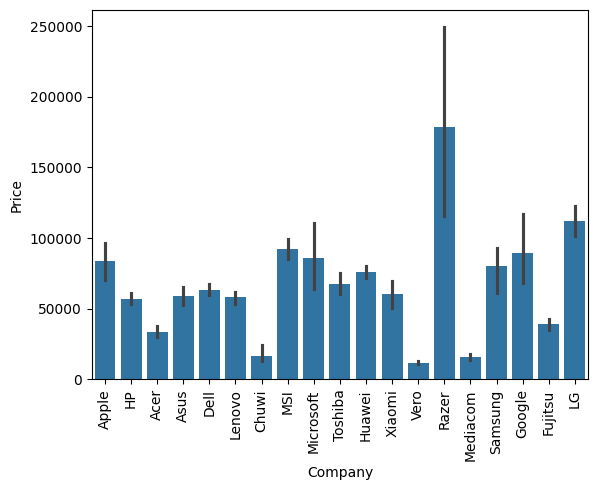

In [125]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

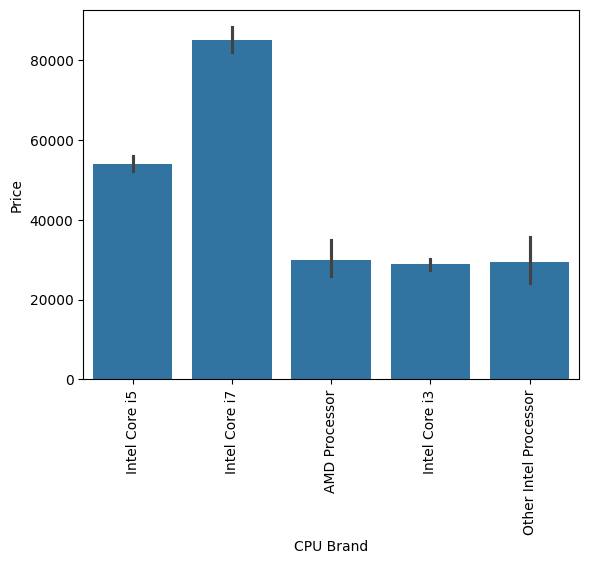

In [126]:
sns.barplot(x=df['CPU Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

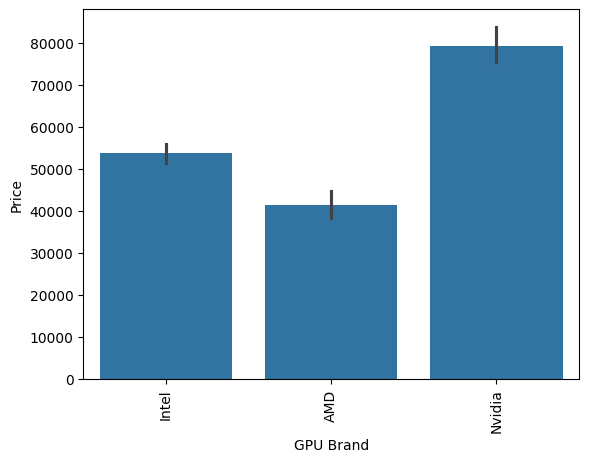

In [127]:
sns.barplot(x=df['GPU Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Ram - 2 <br>
SSD - 10 <br>
PPI - 7 <br>
IPS - 6 <br>
HDD - 9 <br>
These are important for the prediction according to their correlation with price.
We will also be using: <br>
Company - 0 <br>
CPU Brand - 8 <br>
GPU Brand - 11 <br>

So we will be dropping the columns: TypeName, Weight, Touchescreen, OS



In [128]:
X = df.drop(columns=['Price', 'TypeName', 'Weight', 'Touchscreen', 'OS'])
y = np.log(df['Price'])

In [129]:
X

,Company,Ram,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand
0,Apple,8,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,8,0,127.677938,Intel Core i5,0,0,Intel
2,HP,8,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,16,1,220.534629,Intel Core i7,0,512,AMD
4,Apple,8,1,226.983001,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...
1298,Lenovo,4,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,16,1,276.053526,Intel Core i7,0,512,Intel
1300,Lenovo,2,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,6,0,100.454667,Intel Core i7,1000,0,AMD


In [130]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    1302 non-null   object 
 1   Ram        1302 non-null   int32  
 2   IPS        1302 non-null   int64  
 3   PPI        1302 non-null   float64
 4   CPU Brand  1302 non-null   object 
 5   HDD        1302 non-null   int64  
 6   SSD        1302 non-null   int64  
 7   GPU Brand  1302 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 86.5+ KB


In [131]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=6)

In [133]:
X_train

,Company,Ram,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand
269,Lenovo,8,0,141.211995,Intel Core i7,0,256,Intel
502,Lenovo,8,1,158.482535,Intel Core i5,0,256,Intel
481,Dell,4,0,100.454667,Intel Core i3,1000,0,Intel
1209,Asus,16,0,141.211995,Intel Core i7,1000,256,Nvidia
503,Lenovo,4,0,111.935204,Other Intel Processor,500,0,Intel
...,...,...,...,...,...,...,...,...
335,HP,8,0,157.350512,Intel Core i5,0,256,Intel
618,MSI,16,0,141.211995,Intel Core i7,1000,256,Nvidia
227,Asus,8,0,141.211995,Intel Core i5,0,256,Nvidia
713,Asus,4,0,157.350512,Other Intel Processor,0,0,Intel


In [134]:
X_test

,Company,Ram,IPS,PPI,CPU Brand,HDD,SSD,GPU Brand
724,MSI,8,0,127.335680,Intel Core i7,1000,128,Nvidia
14,Apple,8,1,226.415547,Other Intel Processor,0,256,Intel
165,MSI,16,1,141.211995,Intel Core i7,1000,256,Nvidia
823,MSI,8,0,141.211995,Intel Core i5,0,256,Nvidia
459,HP,8,0,106.113067,Intel Core i3,0,256,Intel
...,...,...,...,...,...,...,...,...
17,Apple,16,1,220.534629,Intel Core i7,0,512,AMD
590,Asus,8,0,100.454667,Intel Core i5,1000,0,Intel
107,Asus,8,1,157.350512,Intel Core i7,0,256,Nvidia
1,Apple,8,0,127.677938,Intel Core i5,0,0,Intel


# **Feature Scaling**

We see 5 features with numeric values [Price is excluded as it is our target value]

  Touchscreen  
  IPS          
  PPI
  HDD
  SSD


We will scale these 3 feature columns. And will categorically encode all the other columns as all the other columns contains categorical values.

In [135]:
# # Standardizing the data
# from sklearn.preprocessing import StandardScaler

# # Initialize StandardScaler
# scaler = StandardScaler()

# # Fit and transform the train data
# X_train_scaled = scaler.fit_transform(X_train)

# # Use transform methode to standardize or scale the data based on the mean and standard deviation-
# # calculated during the fit phase.
# X_test_scaled = scaler.transform(X_test)


In [136]:
print("=============== X Train Encoded ===============")
print(X_train)
print("=============== Y Train Encoded ===============")
print(y_train)

=============== X Train Encoded ===============
     Company  Ram  IPS         PPI              CPU Brand   HDD  SSD GPU Brand
269   Lenovo    8    0  141.211995          Intel Core i7     0  256     Intel
502   Lenovo    8    1  158.482535          Intel Core i5     0  256     Intel
481     Dell    4    0  100.454667          Intel Core i3  1000    0     Intel
1209    Asus   16    0  141.211995          Intel Core i7  1000  256    Nvidia
503   Lenovo    4    0  111.935204  Other Intel Processor   500    0     Intel
...      ...  ...  ...         ...                    ...   ...  ...       ...
335       HP    8    0  157.350512          Intel Core i5     0  256     Intel
618      MSI   16    0  141.211995          Intel Core i7  1000  256    Nvidia
227     Asus    8    0  141.211995          Intel Core i5     0  256    Nvidia
713     Asus    4    0  157.350512  Other Intel Processor     0    0     Intel
906       HP    8    0  176.232574          Intel Core i7     0  512     Intel

[91

# **IMPLMENTATION OF ML MODELS**

In [137]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

LINEAR REGRESSION

In [139]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,4,7])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
r2_lr=r2_score(y_test,y_pred)
mae_lr=mean_absolute_error(y_test,y_pred)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print("Model accuracy using Linear Regression: ", round(r2_score(y_test,y_pred)*100, 2), "%")

R2 score 0.7943761057323986
MAE 0.21683258908812364
Model accuracy using Linear Regression:  79.44 %


KNN


In [140]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,4,7])
],remainder='passthrough')


step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
r2_knn=r2_score(y_test,y_pred)
mae_knn=mean_absolute_error(y_test,y_pred)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print("Model accuracy using KNN: ", round(r2_score(y_test,y_pred)*100, 2), "%")

R2 score 0.8055960632338273
MAE 0.21165276066825575
Model accuracy using KNN:  80.56 %


DECISION TREE

In [141]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False, drop='first'),[0,4,7])
],remainder='passthrough')


step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
r2_dt=r2_score(y_test,y_pred)
mae_dt=mean_absolute_error(y_test,y_pred)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print("Model accuracy using Decision Tree: ", round(r2_score(y_test,y_pred)*100, 2), "%")

R2 score 0.8214048675520917
MAE 0.1972471536862629
Model accuracy using Decision Tree:  82.14 %


# **Visualization of the Data**

PREDICTION ACCURACY OF ML MODELS AND COMPARISON

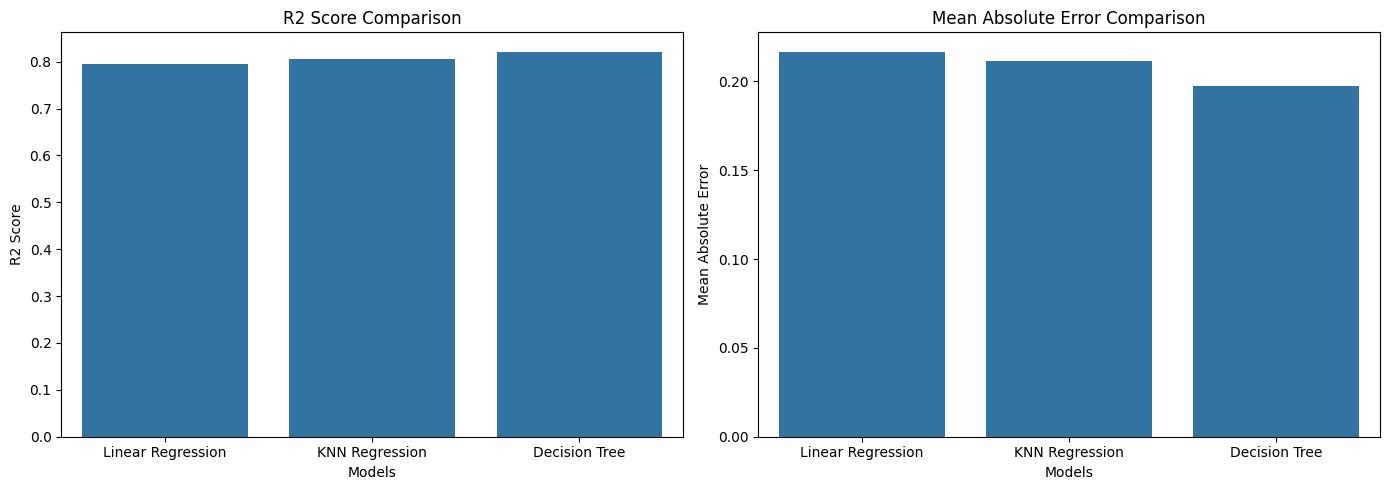

In [142]:



r2_scores = {'Linear Regression': r2_lr, 'KNN Regression': r2_knn, 'Decision Tree': r2_dt}
mae_scores = {'Linear Regression': mae_lr, 'KNN Regression': mae_knn, 'Decision Tree': mae_dt}

models = list(r2_scores.keys())
r2_values = list(r2_scores.values())
mae_values = list(mae_scores.values())

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# R2 Score Comparison
sns.barplot(x=models, y=r2_values, ax=ax[0])
ax[0].set_title('R2 Score Comparison')
ax[0].set_ylabel('R2 Score')
ax[0].set_xlabel('Models')

# MAE Comparison
sns.barplot(x=models, y=mae_values, ax=ax[1])
ax[1].set_title('Mean Absolute Error Comparison')
ax[1].set_ylabel('Mean Absolute Error')
ax[1].set_xlabel('Models')


plt.tight_layout()
plt.show()


BAR/GRAPH CORRELATION OF OTHER FACTORS WITH PRICE

<Axes: >

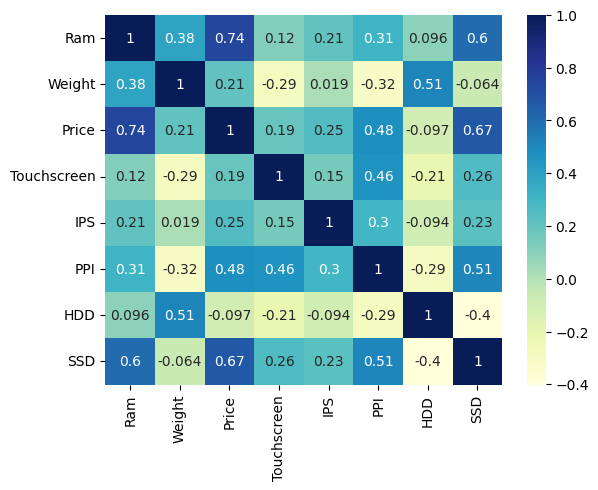

In [143]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")


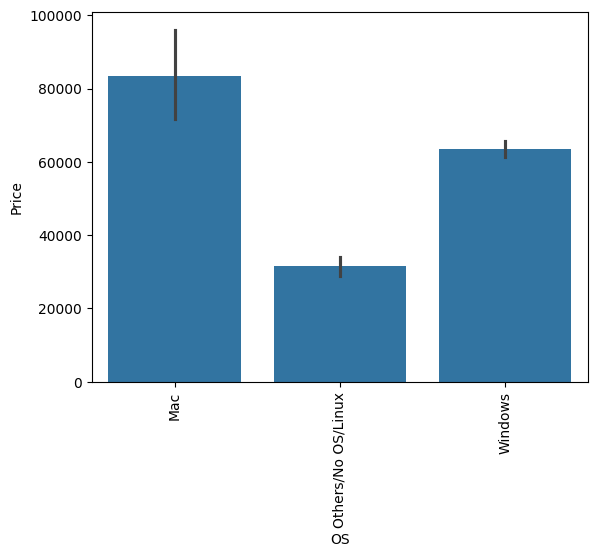

In [144]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/tmp/ipython-input-3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

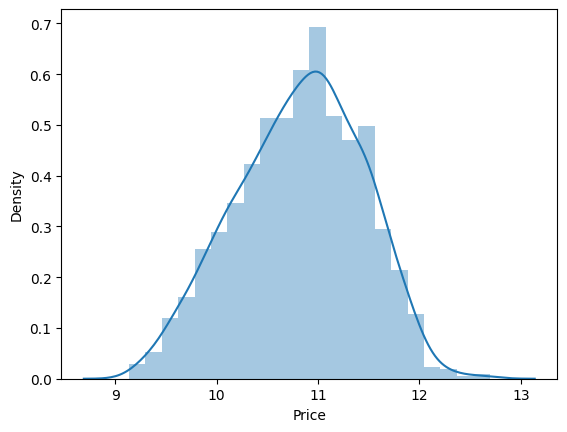

In [145]:
sns.distplot(np.log(df['Price']))